## Modelos de Regressão

### Regressão Linear

- Rx^-1 = la.pinv(np.dot(x, x.T))
- rxy = np.dot(x, y.T)

#### Coeficiente R2

- Media da variavel dependente: MUy
- Soma dos quadrados (proporcional a variancia): SQtot
- Soma dos quadrados explicados (y^ predicao): SQexp
- Soma dos quadrados dos residuos (y − yˆ predicao): SQres
- Notar que SQtot = SQexp + SQres

R2 = SQexp / SQtot = 1 - (SQres / SQtot)

### Exemplo de pontos em torno de uma Recta

#### Primeiro Exercício

In [5]:
import pickle
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt

In [7]:
D = pickle.load(open('PreparacaoLaboratorio4/RegressData001.p', 'rb'))
x = D['x']
y = D['y']

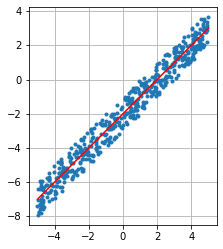

In [8]:
plt.plot(x[0, :], y[0, :], '.')
plt.axis('scaled')
plt.grid(True)

#Reta Verdadeira
plt.plot(np.array([-5, 5]), np.array([-5, 5]) - 2, 'r')

In [9]:
X = np.vstack((np.ones(500), x)) #Adicionar as coordenadas homogéneas

Rx = np.dot(X, X.T)
rxy = np.dot(X, y.T)
w = np.dot(la.pinv(Rx), rxy)

print(w)

[[-2.01391133]
 [ 0.99728753]]


In [12]:
ye = np.dot(w.T, X)

print(ye.shape)

(1, 500)


(-5.0, 5.0, -2.0, 2.0)

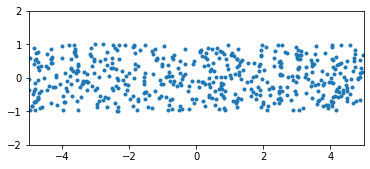

In [17]:
e = y - ye #Erro -> y real - y estimado

plt.plot(x[0, :], e[0, :], '.') #Visualização do Erro
plt.axis('scaled')
plt.axis([-5, 5, -2, 2])

In [20]:
m = np.mean(y) #Arranjar a média de Y
Vtot = np.mean((y - m) ** 2) #Variância Total do Y
Pe = np.mean(e ** 2) #Potência do Erro
R2 = 1 - Pe / Vtot

print(R2)

0.965452847371007


#### Segundo Exercício

In [22]:
import pickle
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt

In [23]:
D = pickle.load(open('PreparacaoLaboratorio4/RegressData002.p', 'rb'))
x = D['x']
y = D['y']

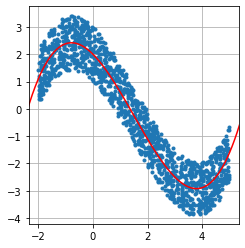

In [25]:
plt.plot(x[0, :], y[0, :], '.')
plt.axis('scaled')
plt.grid(True)

# Equacação Verdadeira
t = np.linspace(-3, 6, 500)
plt.plot(t, 1/9 * t**3 - 1/2*t**2 - t + 2, 'r')

##### Estimar uma Reta para estes pontos 

In [33]:
X = np.vstack((np.ones(x.shape[1]), x)) #Adicionar a coordenada homogénea

Rx = np.dot(X, X.T)
rxy = np.dot(X, y.T)
w = np.dot(la.pinv(Rx), rxy)

print(w)

[[ 1.11538364]
 [-0.91987301]]


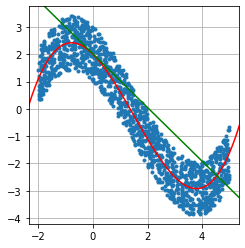

In [47]:
plt.plot(x[0, :], y[0, :], '.')
plt.axis('scaled')
plt.grid(True)

# Polinómio Verdadeiro
t = np.linspace(-3, 6, 500)
plt.plot(t, 1/9 * t**3 - 1/2*t**2 - t + 2, 'r')

# Reta Estimada
plt.plot(np.array([-3, 6]), np.array([-3, 6]) * w[1] + w[0], 'g')

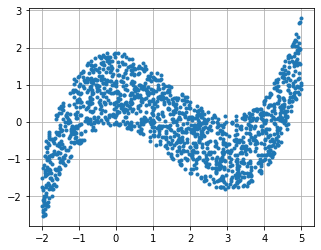

In [40]:
ye = np.dot(w.T, X)
e = y - ye

plt.plot(x[0, :], e[0, :], '.') #Visualização do Erro. Apresenta um padrão, isto indica que o classificador não está bom.
plt.axis('scaled')
plt.grid(True)

In [44]:
m = np.mean(y)
Vtot = np.mean((y - m) ** 2) #Variância total de Y
Pe = np.mean(e ** 2) #Potência do erro
R2 = 1 - Pe / Vtot

print(R2) #Embora seja um número alto, nós podemos ver que a estimação não foi bem conseguida

0.8001643397731499


##### Estimar um Polinómio de Terceira Ordem para estes pontos 

In [48]:
X = np.vstack((np.ones(x.shape[1]), x, x ** 2, x ** 3)) #Adicionar a coordenada homogénea e aos restantes x's.

Rx = np.dot(X, X.T)
rxy = np.dot(X, y.T)
w = np.dot(la.pinv(Rx), rxy)

print(w)

[[ 2.01160905]
 [-0.98245165]
 [-0.51315283]
 [ 0.11294984]]


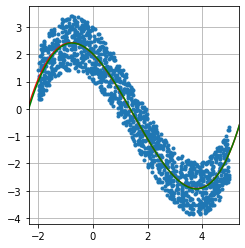

In [50]:
plt.plot(x[0, :], y[0, :], '.')
plt.axis('scaled')
plt.grid(True)

# Polinómio Verdadeiro
t = np.linspace(-3, 6, 500)
plt.plot(t, 1/9 * t**3 - 1/2*t**2 - t + 2, 'r')

# Polinómio Estimado
plt.plot(t, w[3]*t**3 + w[2]*t**2 + w[1]*t + w[0], 'g')

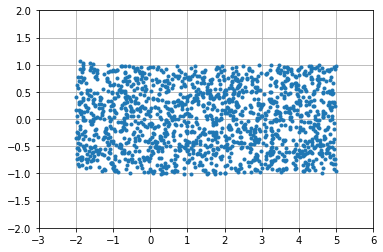

In [56]:
ye = np.dot(w.T, X)
e = y - ye

plt.plot(x[0, :], e[0, :], '.') #Visualização do Erro. Agora não apresenta padrões, está uniforme. É bom sinal
plt.axis([-3, 6, -2, 2])
plt.grid(True)

In [58]:
m = np.mean(y)
Vtot = np.mean((y - m) ** 2) #Variância total de Y
Pe = np.mean(e ** 2) #Potência do erro
R2 = 1 - Pe / Vtot

print(R2) #O polinómio estimado sobrepoem-se ao polinómio original. Embora seja um valor "baixo", é o melhor que encontramos

0.9255804391025634


### Exemplo: Boston Dataset

In [59]:
import sklearn.datasets as DT
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [61]:
D = DT.load_boston()

In [63]:
X = D.data
y = D.target

In [64]:
X1, X2, y1, y2 = train_test_split(X, y, test_size=1/3, shuffle=True, random_state=42)

In [65]:
print(X.shape)
print(X1.shape)
print(X2.shape)

(506, 13)
(337, 13)
(169, 13)


In [78]:
rl = LinearRegression().fit(X1, y1)

print(rl.score(X1, y1)) #Equivalente ao R2 de X1
print(rl.score(X2, y2)) #Equivalente ao R2 de X2

0.7389831456966496
0.7262099239984425


In [69]:
print(rl.intercept_) #Equivalente ao w[0]
print(rl.coef_) #Equivalente aos restantes w's

33.44083427388364
[-1.29469552e-01  3.79597901e-02  6.09783935e-02  3.21349778e+00
 -1.64996136e+01  3.91151860e+00 -1.26019052e-02 -1.42774164e+00
  2.39545629e-01 -8.17982439e-03 -9.35991036e-01  1.19478911e-02
 -5.46562433e-01]


##### Arranjar os w's pelas formas dadas anteriormente e comparar

In [76]:
#Não esquecer que os datasets vêm com os dados ao contrário. Dai ser preciso o .T em todas as matrizes
Xa = np.vstack((np.ones(X1.shape[0]), X1.T)) #Adicionar as coordenadas homogéneas

Rx = np.dot(Xa, Xa.T)
rxy = np.dot(Xa, y1.T)
w2 = np.dot(la.pinv(Rx), rxy)

print(w2)

[ 3.34408343e+01 -1.29469552e-01  3.79597901e-02  6.09783935e-02
  3.21349778e+00 -1.64996136e+01  3.91151860e+00 -1.26019052e-02
 -1.42774164e+00  2.39545629e-01 -8.17982439e-03 -9.35991036e-01
  1.19478911e-02 -5.46562433e-01]


In [79]:
ya = np.dot(w2.T, Xa) #Y estimado

m = np.mean(y1) #Média do Y1
V = np.mean((y1 - m) ** 2) #Variância total do Y1
P = np.mean((y1 - ya) ** 2) #Potência do Erro
R2 = 1 - P / V

print(R2)

0.7389831456966496


#### Exemplo: Boston Dataset com Regressão Polinomial

In [81]:
from sklearn.preprocessing import PolynomialFeatures

In [82]:
D = DT.load_boston()

In [83]:
X = D.data
y = D.target

In [84]:
X1, X2, y1, y2 = train_test_split(X, y, test_size=1/3, shuffle=True, random_state=42)

In [128]:
#O parametro "include_bias" significa adicionar a coordenada homogénea automaticamente.
#Ou seja, não descarta a primeira linha dos dados.
poly = PolynomialFeatures(degree=2, include_bias=False).fit(X1)
X1a = poly.transform(X1)
X2a = poly.transform(X2)

In [130]:
#Apresenta 104 dimensões, mas será 105 com a coordenada homogénea.
print(X1a.shape)
print(X2a.shape)

(337, 104)
(169, 104)


Serão 105 dimensões porque:
- 13 parametros das dimensões
- 13 parametros de cada dimensão ao quadrado (polinómio de grau 2)
- 78 combinações de cada dimensão (x1*x2 + x1*x3 + x1*x4 + ... + x1*x3 + x2*x3 + x2* x4 + ... + x12 * x13)
- 1 coordenada homogénea
Soma total: 105

In [131]:
rl = LinearRegression().fit(X1a, y1)

In [132]:
print(rl.score(X1a, y1)) #Equivalente ao R2 do X1a
print(rl.score(X2a, y2)) #Equivalente ao R2 do X2a

0.9469761182159453
0.7261266091761202


In [133]:
#rl.intercept_ equivale ao w[0]
#rl.coef_ equivale aos restantes w's

w = np.hstack((rl.intercept_, rl.coef_))

In [134]:
print(w.shape) #105 dimensões como previamente calculado

(105,)


In [135]:
print(w.max())

251.3212538584612


Isto significa que uma das dimensões tem um peso de 251.

Isto é um valor muito alto e é um sinal de sobreaprendizagem.

Quanto maior for a ordem do modelo, mais fácil é esse modelo entrar em sobreaprendizagem.

##### Vamos observar com um polinómio de terceira ordem 

In [136]:
poly = PolynomialFeatures(degree=3, include_bias=False).fit(X1)
X1a = poly.transform(X1)
X2a = poly.transform(X2)

In [137]:
print(X1a.shape)
print(X2a.shape)

(337, 559)
(169, 559)


Como é possível observar, apresenta 559 dimensões e serão 560 com a coordenada homogénea.

In [138]:
rl = LinearRegression().fit(X1a, y1)

print(rl.score(X1a, y1)) #Equivalente ao R2 do X1a
print(rl.score(X2a, y2)) #Equivalente ao R2 do X2a

1.0
-133.36697526732283


Como é possível observar, o R2 no treino é perfeito, sendo o 1 o máximo valor possível.

Nos dados de teste, o valor é negativo. Este é um sinal claro que as coisas estão a correr muito mal, dado que o R2 devia ser um valor entre 0 e 1.

<b>O valor negativo significa que a potência do erro varia mais que os próprios y's.</b>

In [139]:
#rl.intercept_ equivale ao w[0]
#rl.coef_ equivale aos restantes w's

w = np.hstack((rl.intercept_, rl.coef_))
print(w.max())

1.5942627143715162


Neste caso, o coeficiente mais alto não é muito elevado, o que nos podia levar a concluir que as coisas não estão a correr assim tão mal, embora já tenhamos a prova que tal não se verifica.

In [140]:
y2e = rl.predict(X2a) #Equivalente ao y2 Estimado

In [141]:
print(y2[: 10])
print()
print(y2e[: 10])

[23.6 32.4 13.6 22.8 16.1 20.  17.8 14.  19.6 16.8]

[ 20.90823934  60.62796266  -9.2096118   32.4639553   20.8776215
 -26.36721917  17.19974485   8.30127614  -7.19474958  14.89407173]


No primeiro array, estão os verdadeiros preços de casa de Boston para os dados de teste.

No segundo array, estão os preços estimados para os dados de teste. Como podemos observar, alguns são negativos, o que não faz absolutamente sentido nenhum e é outro claro sinal que as coisas não estão a correr bem.

Vamos observar para os dados de treino.

In [142]:
y1e = rl.predict(X1a) #Equivalente ao y1 Estimado

print(y1[: 10])
print()
print(y1e[: 10])

[27.1 20.1 19.8 21.  41.3 23.2 20.4 18.5 29.4 36.4]

[27.1 20.1 19.8 21.  41.3 23.2 20.4 18.5 29.4 36.4]


Como podemos observar, e já o tinhamos concluído antes com o R2 do treino, o modelo aceita na perfeição os preços das casas, mas quando chega às de teste, como observamos acima, falha redondamente.

Assim, podemos concluir que este modelo de terceira ordem está a entrar em sobreaprendizagem.

A seguir, vamos estudar como combater esta sobreaprendizagem

### Regularização

Serve para penalizar pesos (w's) que tenham valores elevados.

O sklearn tem duas formas de regularização:
- (L2) Ridge: Adicionar ao erro quadrático, a soma de cada coeficiente de w (peso) ao quadrado
- (L1) Lasso: Adicionar ao erro quadrático, a soma do valor absoluto dos coeficientes de w (peso)

Ambas a funções possuem um termo alpha. Este simboliza a importância que vamos dar ao termo de regularização.
- Alphas com valores elevados, significa que existe muita regularização
- Alphas com valores reduzidos, significa que existe pouca regularização

<b>Notas:</b>
- Tipicamente não se faz regularização no termo de polarização (w[0])
- Na função Ridge, o erro quadrático é uma hiper-parábola, assim como a soma de cada coeficiente ao quadrado. Ao somar as duas, obtem-se outra hiper-parábola. Isto significa que dá para resolver o vector w (resultado) analiticamente. Derivamos a função total do erro, igualar a zero e resolver as equações resultantes.
- Na função Lasso, isto já não se mostra possível. O erro quadrático é uma hiper-parábola, mas a soma do valor absoluto dos coeficientes de w (peso) tem um formato em V. Esta última não tem nenhum ponto em que a deriva é igual a zero.

#### Boston Dataset: Regularização

In [162]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso

##### Ridge

In [163]:
D = DT.load_boston()

X = D.data
y = D.target

X1, X2, y1, y2 = train_test_split(X, y, test_size=1/3, shuffle=True, random_state=42)

poly = PolynomialFeatures(degree=2, include_bias=False).fit(X1)
X1a = poly.transform(X1)
X2a = poly.transform(X2)

In [147]:
rl = Ridge(alpha=1).fit(X1a, y1)

print(rl.score(X1a, y1)) #Equivalente ao R2 de X1a
print(rl.score(X2a, y2)) #Equivalente ao R2 de X2a

0.9417314853302341
0.6711733316439537


In [148]:
rl = Ridge(alpha=10).fit(X1a, y1)

print(rl.score(X1a, y1)) #Equivalente ao R2 de X1a
print(rl.score(X2a, y2)) #Equivalente ao R2 de X2a

0.9354746505278223
0.7515959862212287


In [151]:
rl = Ridge(alpha=100).fit(X1a, y1)

print(rl.score(X1a, y1)) #Equivalente ao R2 de X1a
print(rl.score(X2a, y2)) #Equivalente ao R2 de X2a

0.9225434699621162
0.7943924117246791


Como podemos observar, à medida que aumentamos o valor de alpha, melhor será o nosso R2.

Vamos observar o que este alpha está a fazer aos pesos (w)

In [154]:
print(X1a.shape) #104 dimensões + 1 dimensão w[0]

(337, 104)


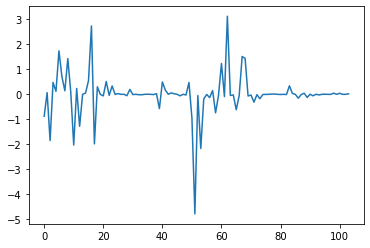

In [158]:
rl = Ridge(alpha=1).fit(X1a, y1)

plt.plot(rl.coef_)

Observamos que com o alpha a 1, os pesos (w) variam entre -5 e 3.

Vamos observar os pesos com alpha a 100

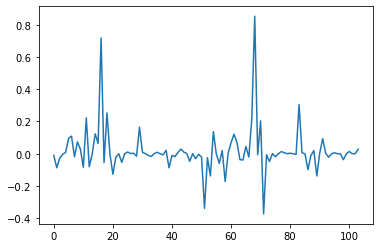

In [159]:
rl = Ridge(alpha=100).fit(X1a, y1)

plt.plot(rl.coef_)

Como podemos observar, com alpha a 100, os valores variam entre -0.4 a 0.8.

Isto significa que quanto maior o alpha, mais os pesos serão penalizados.

##### Lasso

In [164]:
D = DT.load_boston()

X = D.data
y = D.target

X1, X2, y1, y2 = train_test_split(X, y, test_size=1/3, shuffle=True, random_state=42)

poly = PolynomialFeatures(degree=2, include_bias=False).fit(X1)
X1a = poly.transform(X1)
X2a = poly.transform(X2)

In [165]:
rl = Lasso(alpha=1).fit(X1a, y1)

print(rl.score(X1a, y1)) #Equivalente ao R2 de X1a
print(rl.score(X2a, y2)) #Equivalente ao R2 de X2a

0.8914413224692755
0.8329182239945708


C:\Users\fabio\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1935.3112079900454, tolerance: 2.97696387537092
  model = cd_fast.enet_coordinate_descent(


In [167]:
rl = Ridge(alpha=100).fit(X1a, y1)

print(rl.score(X1a, y1)) #Equivalente ao R2 de X1a
print(rl.score(X2a, y2)) #Equivalente ao R2 de X2a

0.9225434699621162
0.7943924117246791


Vamos observar o que acontece aos w's no Lasso

C:\Users\fabio\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1935.3112079900454, tolerance: 2.97696387537092
  model = cd_fast.enet_coordinate_descent(


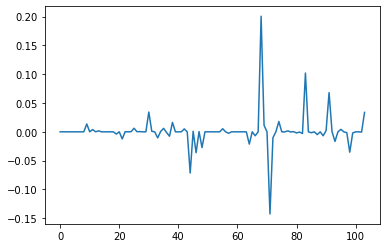

In [169]:
rl = Lasso(alpha=1).fit(X1a, y1)

plt.plot(rl.coef_)

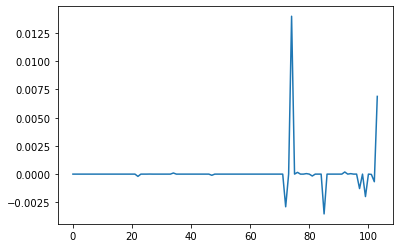

In [170]:
rl = Lasso(alpha=100).fit(X1a, y1)

plt.plot(rl.coef_)

Quanto maior for o seu alpha, os valores podem chegar a 0.

No caso do Ridge, estes ficavam próximos de 0, mas nunca 0.

Vamos demonstrar isto

In [174]:
rl = Ridge(alpha=1).fit(X1a, y1)
w = rl.coef_

print(np.sum(np.abs(w) > 1e-10))

rl = Ridge(alpha=100).fit(X1a, y1)
w = rl.coef_

print(np.sum(np.abs(w) > 1e-10))

rl = Lasso(alpha=1).fit(X1a, y1)
w = rl.coef_

print(np.sum(np.abs(w) > 1e-10))

rl = Lasso(alpha=10).fit(X1a, y1)
w = rl.coef_

print(np.sum(np.abs(w) > 1e-10))

104
104
57
31


C:\Users\fabio\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1935.3112079900454, tolerance: 2.97696387537092
  model = cd_fast.enet_coordinate_descent(
C:\Users\fabio\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2376.0468666757547, tolerance: 2.97696387537092
  model = cd_fast.enet_coordinate_descent(


Como podemos ver, no Ridge temos sempre as 104 dimensões (não contando com o w[0]) acima de 0, enquanto o Lasso, para um alpha de 1 apenas possui 57 e para um alpha de 100, apenas 31.

### Regressão: Sinais Áudio (Instrumentos Musicais)

In [191]:
# %load "PreparacaoLaboratorio4/soundPlay.py"
#necessita de ter instalado a toolbox PyAudio
#consultar:
#http://people.csail.mit.edu/hubert/pyaudio/
#Entradas:
#x: numpy array 
#Fs: frequência de amostragem (int16)
import pyaudio 
import numpy as  np

def soundPlay(x,Fs):
    Fs=np.int16(Fs)
    #escalar para +-1
    #converter para float
    x=np.array(x,'float32')
    x=x-x.mean()
    #normalizar
    x=x/np.abs(x).max()
    #converter para inteiros 16bits
    x=np.int16(np.round(x*(2**15-1)))
    
    #converter x para binary string
    xI=x.tostring()
        
        
    #instanciar audio
    auPort=pyaudio.PyAudio()
    #stream
    auStream=auPort.open(format=8,channels=1,rate=Fs,output=True)

    #play x
    auStream.write(xI)

    # stop stream 
    auStream.stop_stream()

    # close PyAudio 
    auPort.terminate()   

In [194]:
import scipy.signal as sg
import scipy.io.wavfile as wav

In [195]:
wavFile = 'PreparacaoLaboratorio4/Violin.arco.ff.sulG.Gb4.mono.wav'
fs, x = wav.read(wavFile)

In [196]:
print(fs) #Frequência de Amostragem
print(x.shape) #Sinal tem 40113 amostras

22050
(40113,)


In [197]:
print(x.shape[0] / fs) #Isto vai-me dar a duração do ficheiro

1.8191836734693878


In [198]:
x = x * 1.0 #Converter para float64
x = x / 2 ** 15 #Compreendido entre -1 e 1

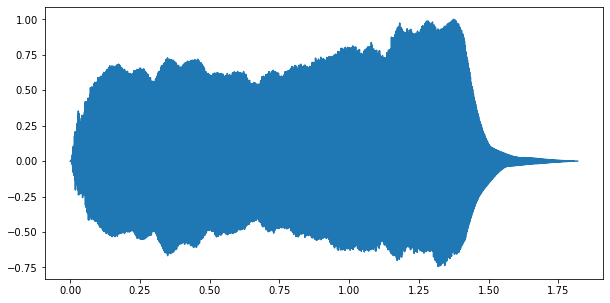

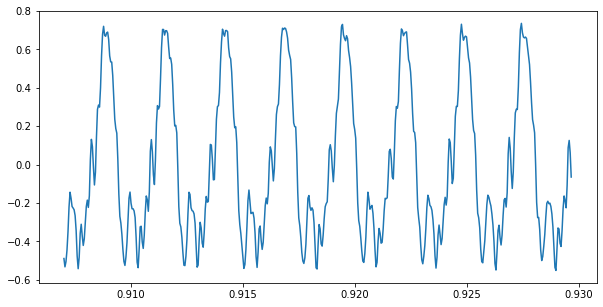

In [203]:
plt.figure(figsize=(10, 5))
plt.plot(np.arange(x.shape[0]) / fs, x)
plt.axis('tight')


plt.figure(figsize=(10, 5))
plt.plot(np.arange(20000, 20500) / fs, x[20000 : 20500])

In [206]:
#soundPlay(x, fs) #Tocar o som

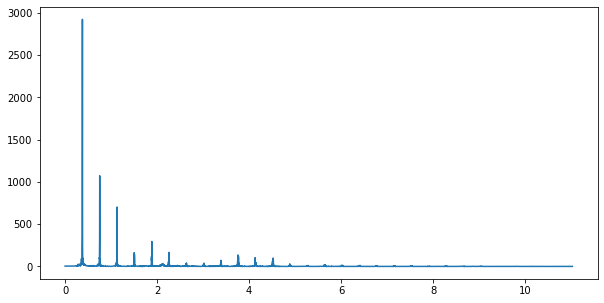

In [213]:
#Visualizar no domínio da frequência
xf = np.abs(np.fft.fft(x, 20000)) #Espectro do sinal
plt.figure(figsize=(10, 5))
f = np.linspace(0, fs / 2, 10000) / 1000
plt.plot(f, xf[:10000])

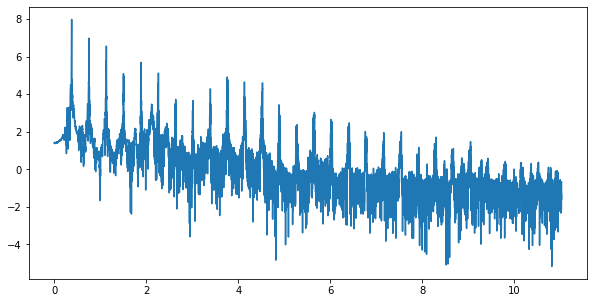

In [215]:
#Visualizar no domínio da frequência
xf = np.abs(np.fft.fft(x, 20000)) #Espectro do sinal
plt.figure(figsize=(10, 5))
f = np.linspace(0, fs / 2, 10000) / 1000
plt.plot(f, np.log(xf[:10000]))

Isto é a transformada de Fourier

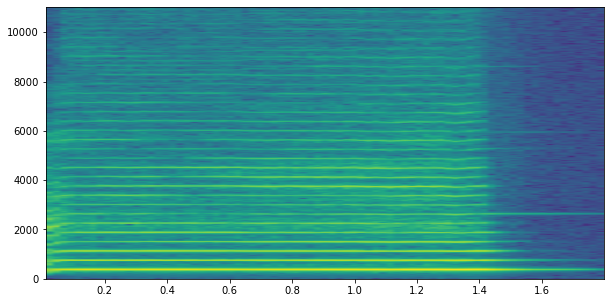

In [217]:
plt.figure(figsize=(10, 5))
tmp = plt.specgram(x, NFFT=1024, noverlap=512, Fs=fs)

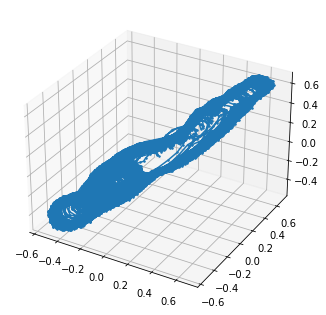

In [224]:
from mpl_toolkits.mplot3d import Axes3D
f1 = plt.figure(figsize=(6, 5.5))
ax = f1.add_subplot(111, projection='3d')
xt = x[1000 : 6001]
ax.plot(xt[0 : -2], xt[1 : -1], xt[2:], '.-', ms=3)

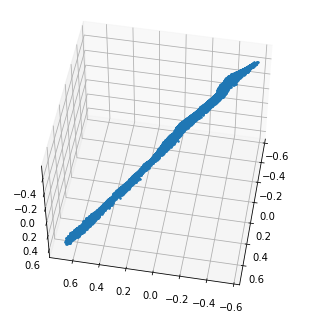

In [226]:
#Visto de outra perspectiva
f1 = plt.figure(figsize=(6, 5.5))
ax = f1.add_subplot(111, projection='3d')
xt = x[1000 : 6001]
ax.plot(xt[0 : -2], xt[1 : -1], xt[2:], '.-', ms=3)

ax.elev = -130
ax.azim = 170

([<matplotlib.axis.YTick at 0x1a018d7d3a0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

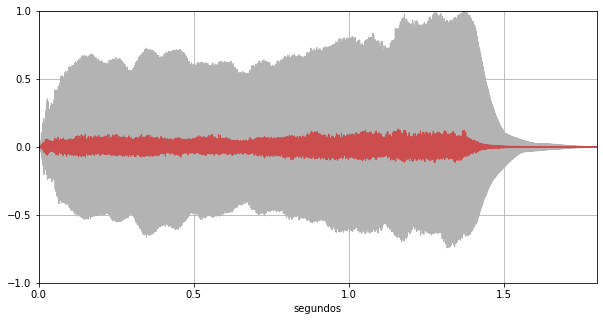

In [229]:
pF = 20 #Ordem do Filtro
X = x[0 : -pF]

for i in np.arange(pF - 1, 0, -1):
    X = np.vstack((x[pF - i : -i], X))
    
# "Matriz" (1xN) dos ys
Y = x[pF : ] #para ficar um array de (1x nº amostras)
Y = Y[np.newaxis, :]

# N = X.shape[1] nº amostras
###############################################
# Estimar vector dos w = [w1, w2, ..., w10].T
Rx = np.dot(X, X.T)
rxy = np.dot(X, Y.T)
w = np.dot(np.linalg.pinv(Rx), rxy)
###############################################
#Ver o erro de estimação
#1. calcular o y^
Y2 = np.dot(w.T, X)
#2. Erro instântaneo Er[n]
Er = Y - Y2
#3. Erro Total SUM(Er[n]^2)
ErTot = sum(Er ** 2)

#fazer plot
plt.figure(figsize=(10, 5))
t = np.linspace(0, 1.0 * Er.shape[1] / fs, Er.shape[1])
plt.plot(t, Y[0, :], '-', lw=1, color=[0.7, 0.7, 0.7])
plt.plot(t, Er[0, :], '-', lw=1, color=[0.8, 0.3, 0.3])
plt.axis([0, 1.8, -1, 1])
plt.grid(True)
plt.xlabel('segundos')
plt.xticks(np.arange(0, 1.8, 0.5))
plt.yticks(np.arange(-1, 1.1, 0.5))

In [236]:
# Sinal Sintetizado
w2 = np.hstack((1, -w.squeeze()))
trDirac = np.zeros(x.shape[0])
trDirac[np.arange(0, x.shape[0], 59)] = 1.0
xSint = sg.lfilter(np.array([1.0]), w2, trDirac)

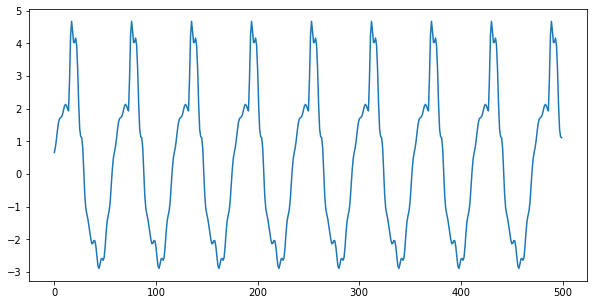

In [237]:
plt.figure(figsize=(10, 5))
plt.plot(xSint[5000 : 5500])

In [238]:
soundPlay(x, fs) #Som Original

<ipython-input-191-c6c948800c1f>:23: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  xI=x.tostring()


In [239]:
soundPlay(xSint, fs) #Som Original

<ipython-input-191-c6c948800c1f>:23: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  xI=x.tostring()


## Modelos de Classificação

### Classificação: discriminantes lineares e quadráticos

#### Duas classes: dígitos "0" e "1"

In [250]:
D = pickle.load(open("PreparacaoLaboratorio4/MNISTsmall.p", 'rb'))

X = D['X'] * 1.0
y = D['trueClass']
f1 = D['foldTrain']
f2 = D['foldTest']

X1 = X[:, f1]
y1 = y[f1]

X2 = X[:, f2]
y2 = y[f2]

In [251]:
#Dados de Treino, digito 0 e digito 1
Xa = X1[:, y1==0]
Xb = X1[:, y1==1]

X1 = np.vstack((np.ones(2000), np.hstack((Xa, Xb))))
y1 = np.hstack((-np.ones(1000), np.ones(1000)))

#Dados de Teste, digito 0 e digito 1
Xa = X2[:, y2==0]
Xb = X2[:, y2==1]

X2 = np.vstack((np.ones(1000), np.hstack((Xa, Xb))))
y2 = np.hstack((-np.ones(500), np.ones(500)))

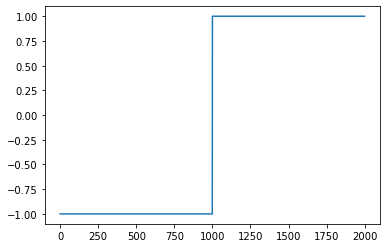

In [253]:
plt.plot(y1)

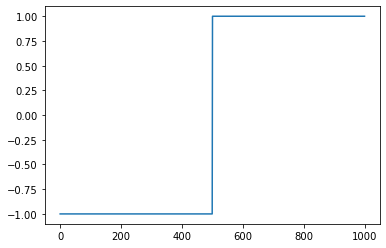

In [254]:
plt.plot(y2)

In [255]:
Rx = np.dot(X1, X1.T)
rxy = np.dot(X1, y1.T)
w = np.dot(la.pinv(Rx), rxy)

y1e = np.dot(w.T, X1)

y2e = np.dot(w.T, X2)

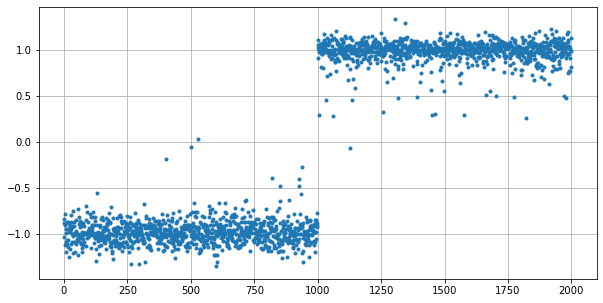

In [256]:
plt.figure(figsize=(10, 5))
plt.plot(y1e , '.')
plt.grid(True)

In [258]:
y1eb = (y1e > 0) * 2 - 1 #Por entre -1 e 1
np.argwhere(y1 != y1eb) #Isto mostra os indices onde existiu uma má classificação

array([[ 527],
       [1127]], dtype=int64)

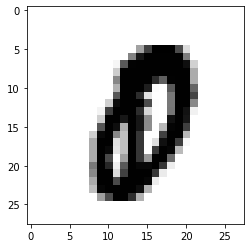

In [262]:
z = X1[1:, 527] #A primeira linha são os 1's adicionados previamente.

plt.imshow(z.reshape(28, 28), cmap='binary')

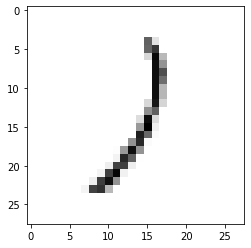

In [263]:
z = X1[1:, 1127]

plt.imshow(z.reshape(28, 28), cmap='binary')

(0.0, 1000.0, -2.0, 2.0)

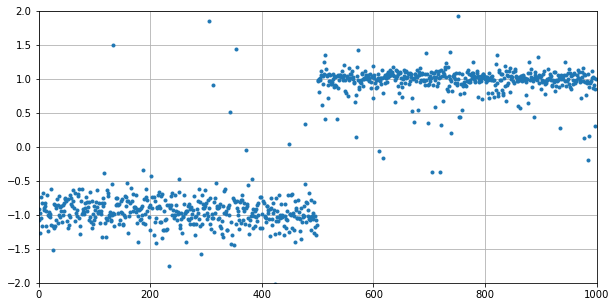

In [266]:
plt.figure(figsize=(10, 5))
plt.plot(y2e, '.')
plt.grid(True)
plt.axis([0, 1000, -2, 2])

In [270]:
y2eb = (y2e > 0) * 2 - 1
idx = np.argwhere(y2 != y2eb).squeeze()
print(idx)

[ 24  63  89 134 196 205 232 306 312 343 346 348 353 402 449 478 610 617
 705 719 848 941 985]


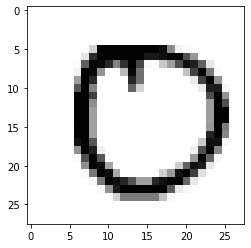

In [273]:
z = X2[1:, 24] #A primeira linha são os 1's adicionados previamente.

plt.imshow(z.reshape(28, 28), cmap='binary')

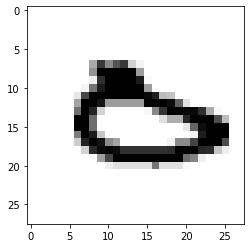

In [274]:
z = X2[1:, 63]

plt.imshow(z.reshape(28, 28), cmap='binary')

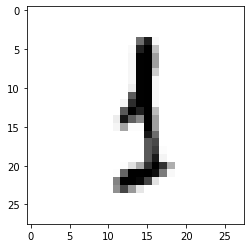

In [276]:
z = X2[1:, 610]

plt.imshow(z.reshape(28, 28), cmap='binary')

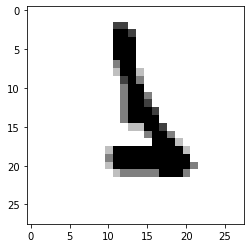

In [277]:
z = X2[1:, 617]

plt.imshow(z.reshape(28, 28), cmap='binary')

### Digitos MNIST: Classificação Multi-Classe

In [279]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import pickle
import sklearn.preprocessing as pp

In [281]:
D = pickle.load(open("PreparacaoLaboratorio4/MNISTsmall.p", 'rb'))

X = D['X']
y = D['trueClass']
f1 = D['foldTrain']
f2 = D['foldTest']

X1 = X[:, f1]
y1 = y[f1]

X2 = X[:, f2]
y2 = y[f2]

In [282]:
X1h = np.vstack((np.ones(X1.shape[1]), X1)) #Adicionar as coordenadas homogéneas aos Dados de Treino
X2h = np.vstack((np.ones(X2.shape[1]), X2)) #Adicionar as coordenadas homogéneas aos Dados de Teste

print(X1.shape)
print(X1h.shape)
print()
print(X2.shape)
print(X2h.shape)

(784, 10000)
(785, 10000)

(784, 5000)
(785, 5000)


In [309]:
Y1 = -np.ones(((np.unique(y1).shape[0]), X1h.shape[1]))

In [310]:
for i in range(np.unique(y1).shape[0]):
    Y1[i, y1==i] = 1

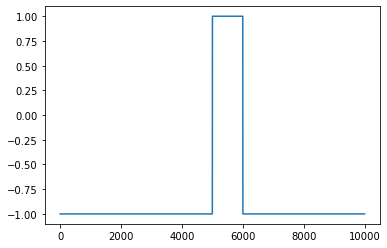

In [311]:
plt.plot(Y1[5, :])

In [316]:
Rx = np.dot(X1h, X1h.T)
Rxy = np.dot(X1h, Y1.T)
W = np.dot(la.pinv(Rx), Rxy)

In [317]:
print(W.shape)

(785, 10)


In [319]:
Y1e = np.dot(W.T, X1h)

print(Y1e.shape)

(10, 10000)


In [320]:
y1e = np.argmax(Y1e, axis=0)
MC = confusion_matrix(y1, y1e)
print(MC)

[[972   1   3   4   2   4   8   0   5   1]
 [  1 971   6   1   4   5   0   0  10   2]
 [ 10  44 835  25  14   3  29   7  31   2]
 [  2  28  27 849   7  25   6  19  11  26]
 [  0  16   4   1 911   7   7   6   6  42]
 [ 23   8   2  58  14 811  25   5  38  16]
 [ 11   5  10   0   9  17 943   0   5   0]
 [  7  25   4   5  26   1   0 879   0  53]
 [ 14  65   8  22  15  28  17   4 801  26]
 [  9   9   5  15  39   2   0  58   8 855]]


In [325]:
print("Número de erros: ", np.sum(y1 != y1e), " | Percentagem de erros: ", np.sum(y1 != y1e) / y1.shape[0] * 100, "%")

Número de erros:  1173  | Percentagem de erros:  11.73 %


In [326]:
#Para os Dados de Teste
Y2e = np.dot(W.T, X2h)
y2e = np.argmax(Y2e, axis=0)
MC = confusion_matrix(y2, y2e)
print(MC)

[[472   0   2   2   1   4   9   0   8   2]
 [  0 483   2   3   2   2   4   1   2   1]
 [  8  49 336  22   8   1  25  20  26   5]
 [  3  13  10 402   3  22   5  16  16  10]
 [  0   7   5   1 440   2   8   3   3  31]
 [ 20   9   3  40  21 337  11  13  30  16]
 [ 12  10  10   0  30  22 409   0   7   0]
 [  4  34   3   7  19   3   1 384   2  43]
 [ 11  32   9  21  23  18  11  10 353  12]
 [  8  11   1   8  47   2   1  27  10 385]]


In [327]:
print("Número de erros: ", np.sum(y2 != y2e), " | Percentagem de erros: ", np.sum(y2 != y2e) / y2.shape[0] * 100, "%")

Número de erros:  999  | Percentagem de erros:  19.98 %


### Discriminantes Quadráticos

In [331]:
D = pickle.load(open("PreparacaoLaboratorio4/QuadDiscData.p", "rb"))

In [332]:
x = D['data']
y = D['target']

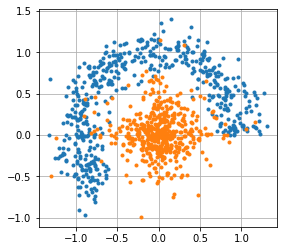

In [333]:
plt.plot(x[0, y==0], x[1, y==0], '.')
plt.plot(x[0, y==1], x[1, y==1], '.')
plt.axis('scaled')
plt.grid(True)

##### Criar um Classificador Linear

In [342]:
X = np.vstack((np.ones(1000), x))
Y = y * 2 - 1

Rx = np.dot(X, X.T)
rxy = np.dot(X, Y.T)
w = np.dot(la.pinv(Rx), rxy)

yb = np.dot(w.T, X)
ye = (yb >= 0) * 1

In [338]:
print("Erros na Estimação: ", np.sum(y != ye))

Erros na Estimação:  266


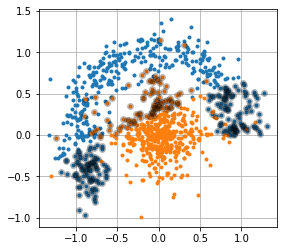

In [340]:
plt.plot(x[0, y==0], x[1, y==0], '.')
plt.plot(x[0, y==1], x[1, y==1], '.')
plt.plot(x[0, y!=ye], x[1, y!=ye], 'ok', alpha=0.2)
plt.axis('scaled')
plt.grid(True)

##### Criar um Classificador Quadrático

In [348]:
poly = pp.PolynomialFeatures(2).fit(x.T) #Aqui estão as 6 combinações possíveis: x0, x1, x2, x1**2, x2**2, x1*x2
X = poly.transform(x.T).T

Y = y * 2 - 1

Rx = np.dot(X, X.T)
rxy = np.dot(X, Y.T)
w = np.dot(la.pinv(Rx), rxy)

yb = np.dot(w.T, X)
ye = (yb >= 0) * 1

In [350]:
print(X.shape)

(6, 1000)


In [351]:
print("Erros na Estimação: ", np.sum(y != ye))

Erros na Estimação:  45


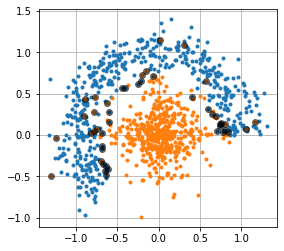

In [353]:
plt.plot(x[0, y==0], x[1, y==0], '.')
plt.plot(x[0, y==1], x[1, y==1], '.')
plt.plot(x[0, y!=ye], x[1, y!=ye], 'ok', alpha=0.5)
plt.axis('scaled')
plt.grid(True)

### Discriminantes Quadráticos Multi-Classe - Iris Dataset

In [355]:
import sklearn.datasets as DT

In [356]:
D = DT.load_iris()

x= D.data
y = D.target

In [358]:
X = np.vstack((np.ones(150), x.T)) #Sklearn vem (número amostras, dimensões), logo tem de ser transposto.

print(X.shape)

(5, 150)


In [359]:
Y = -np.ones((3, 150))
for i in range(3):
    Y[i, y==i] = 1

In [360]:
print(Y[:, 60])

[-1.  1. -1.]


Como ver este valor:
- O ponto 60 pertence à classe 2.
- Assim, a primeira entrada vai ser -1, a segunda 1 e a terceira -1

Assim, é indicado que o valor 60 pertence à classe 2

In [366]:
Rx = np.dot(X, X.T)
rxy = np.dot(X, Y.T)
w = np.dot(la.pinv(Rx), rxy)

yb = np.dot(w.T, X)
ye = np.argmax(yb, axis=0)

print("Número de Erros: ", np.sum(y != ye))

Número de Erros:  23


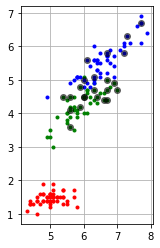

In [368]:
plt.plot(x[y==0, 0], x[y==0, 2], '.r')
plt.plot(x[y==1, 0], x[y==1, 2], '.g')
plt.plot(x[y==2, 0], x[y==2, 2], '.b')
plt.plot(x[y!=ye, 0], x[y!=ye, 2], 'ok', alpha=0.5)
plt.axis('scaled')
plt.grid(True)

#### Discriminante Quadrático

In [369]:
poly = pp.PolynomialFeatures(2).fit(x)
X = poly.transform(x).T
Y = -np.ones((3, 150))

for i in range(3):
    Y[i, y==i] = 1
    
Rx = np.dot(X, X.T)
rxy = np.dot(X, Y.T)
w = np.dot(la.pinv(Rx), rxy)

yb = np.dot(w.T, X)
ye = np.argmax(yb, axis=0)

print("Número de Erros: ", np.sum(y != ye))

Número de Erros:  3


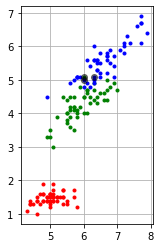

In [370]:
plt.plot(x[y==0, 0], x[y==0, 2], '.r')
plt.plot(x[y==1, 0], x[y==1, 2], '.g')
plt.plot(x[y==2, 0], x[y==2, 2], '.b')
plt.plot(x[y!=ye, 0], x[y!=ye, 2], 'ok', alpha=0.5)
plt.axis('scaled')
plt.grid(True)